<a href="https://colab.research.google.com/github/rishab-gangwar/miniProjects/blob/master/HoughTransformProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from math import log10, sqrt
path = ('./data')
filename = [f for f in listdir(path) if isfile(join(path,f))]

In [9]:
pwd


'/content'

In [10]:
rawimages = []
for f in filename:
    if len(f)==10 :
        p=path+'/'+f
        print(p)
        rawimages.append(cv2.imread(p))
    
    

./data/035_HC.png
./data/036_HC.png
./data/038_HC.png
./data/037_HC.png
./data/039_HC.png


In [11]:
len(rawimages)

5

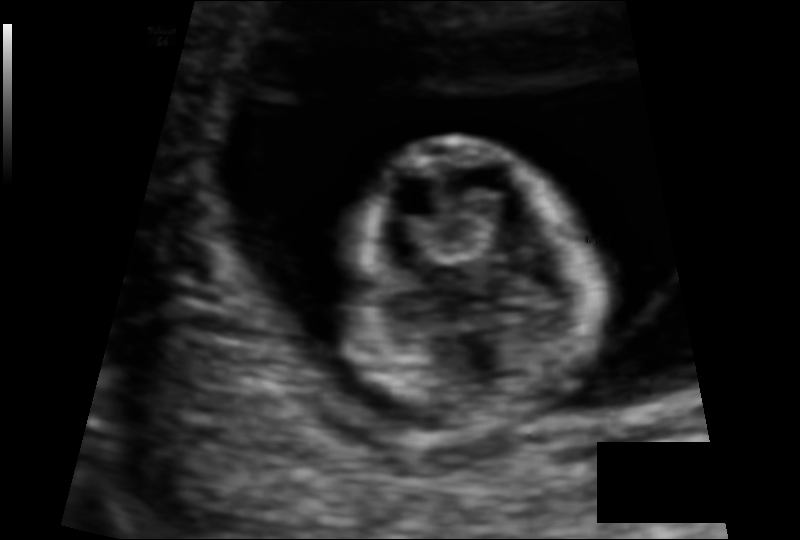

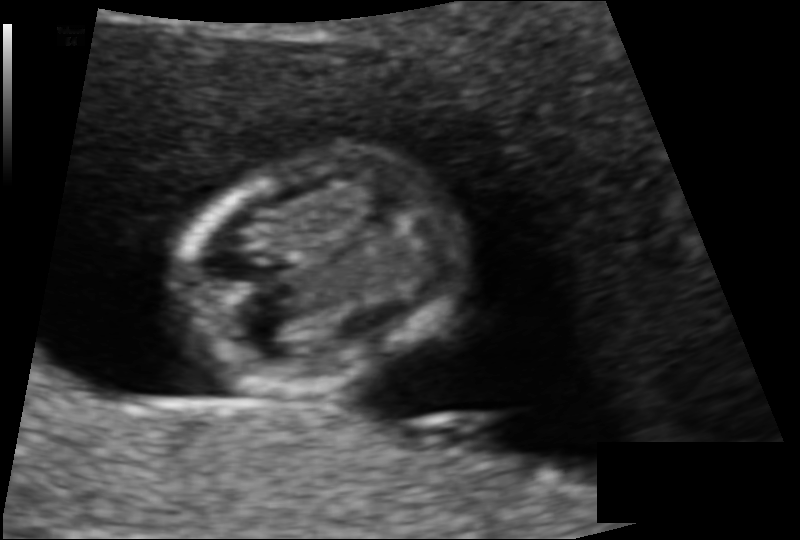

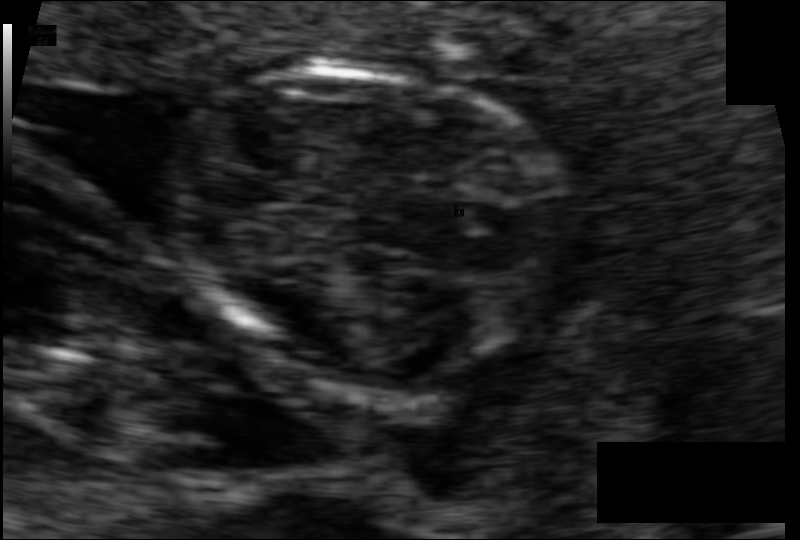

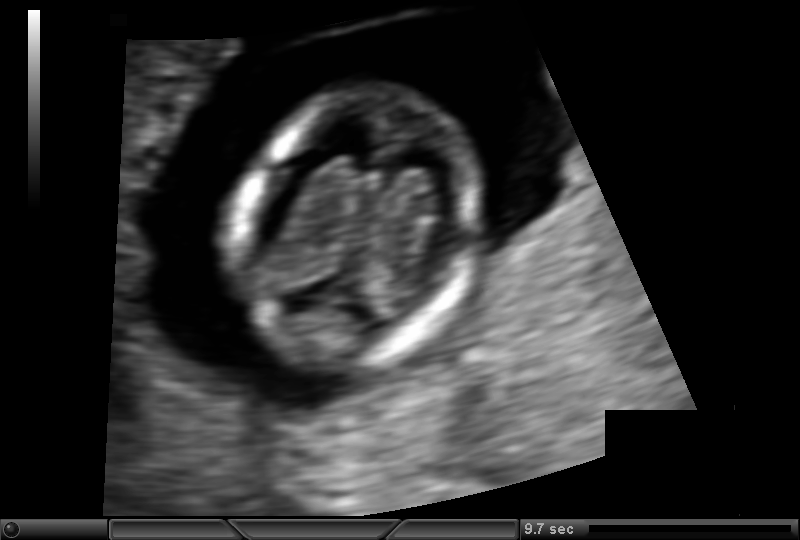

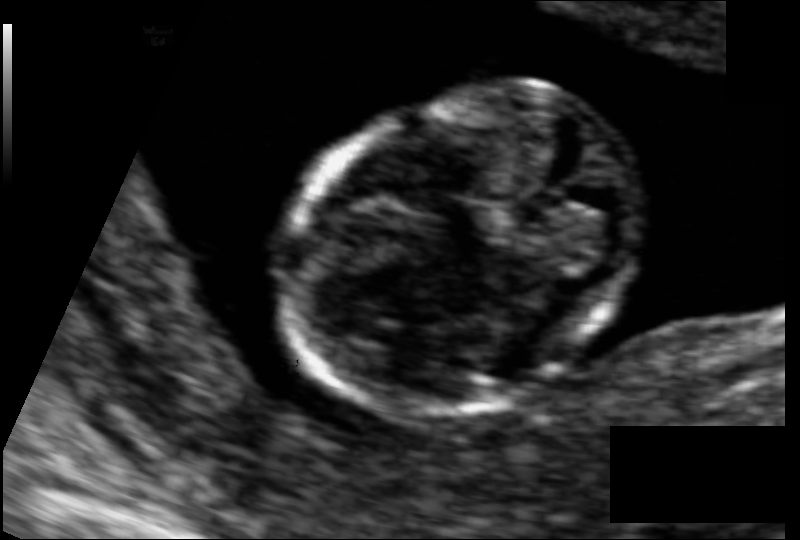

In [12]:
from google.colab.patches import cv2_imshow
for i in range(len(rawimages)):
    cv2_imshow(rawimages[i])
    cv2.waitKey()
    cv2.destroyAllWindows()

## Part 1: Denoising

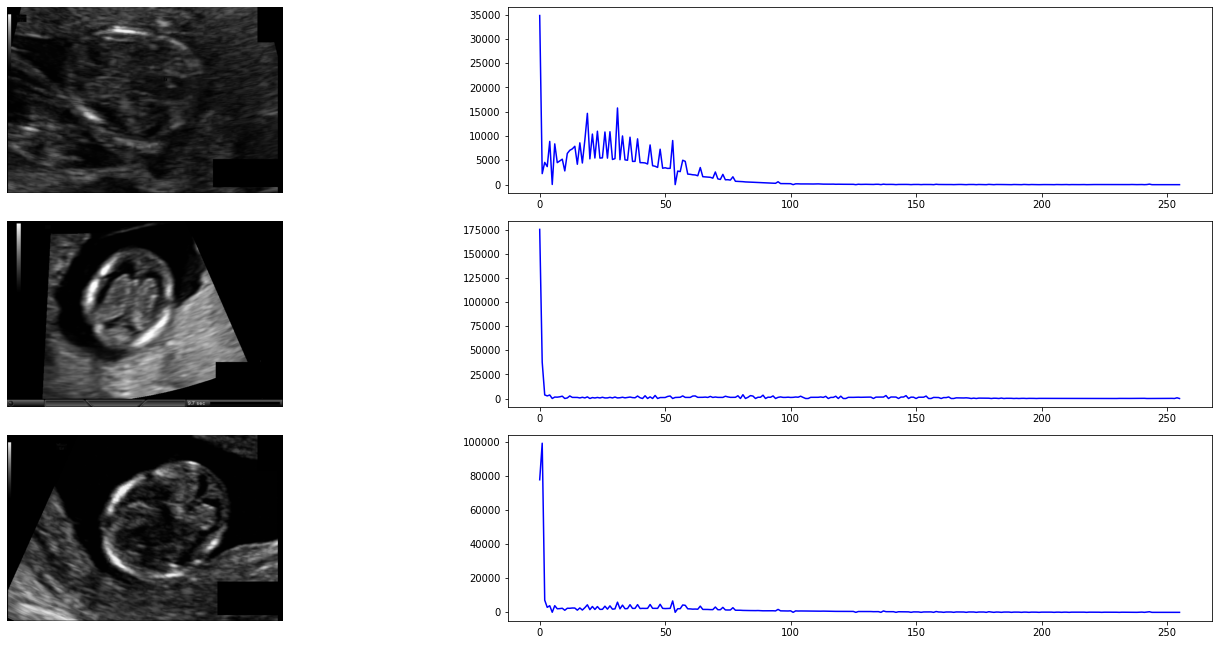

In [13]:
plt.figure(figsize=(20,15))#figsize(Width, height) in inches
# Iterate and plot 
while True:
    i+=1
    plt.subplot(5, 2, i)#plt.subplot(nrows, ncols, index, **kwargs)
    img = rawimages[int(i/2)]
    plt.imshow(img, cmap='gray')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    
    i+=1
    plt.subplot(5, 2, i)
    h = cv2.calcHist([img],[0],None,[256],[0,256])
    plt.plot(h,color='b')
    
    if i+1>10:
        break
    
plt.tight_layout()    
#plt.savefig('images+hists.jpg')

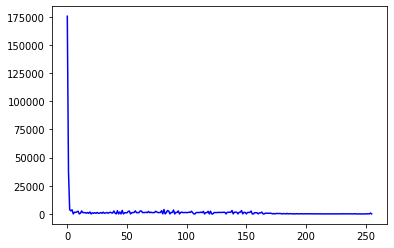

In [15]:
x=rawimages
# Appears Scan 4 has most noise 
img = x[3]
# plt.imshow(img, cmap='gray')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
h = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(h,color='b')

In [16]:
#Prominently Gaussian and Speckle Noise
#PSNR for future calculation
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

PSNR of median filtered 1.0th scan is  44.024311
PSNR of gaussian filtered 1.0th scan is  52.331790
PSNR of bilateral filtered 1.0th scan is  59.669498
PSNR of median filtered 2.0th scan is  44.024311
PSNR of gaussian filtered 2.0th scan is  52.331790
PSNR of bilateral filtered 2.0th scan is  59.669498
PSNR of median filtered 3.0th scan is  48.377891
PSNR of gaussian filtered 3.0th scan is  53.985339
PSNR of bilateral filtered 3.0th scan is  62.937237
PSNR of median filtered 4.0th scan is  51.077094
PSNR of gaussian filtered 4.0th scan is  55.337732
PSNR of bilateral filtered 4.0th scan is  64.104529
PSNR of median filtered 5.0th scan is  48.620719
PSNR of gaussian filtered 5.0th scan is  56.221666
PSNR of bilateral filtered 5.0th scan is  62.309049


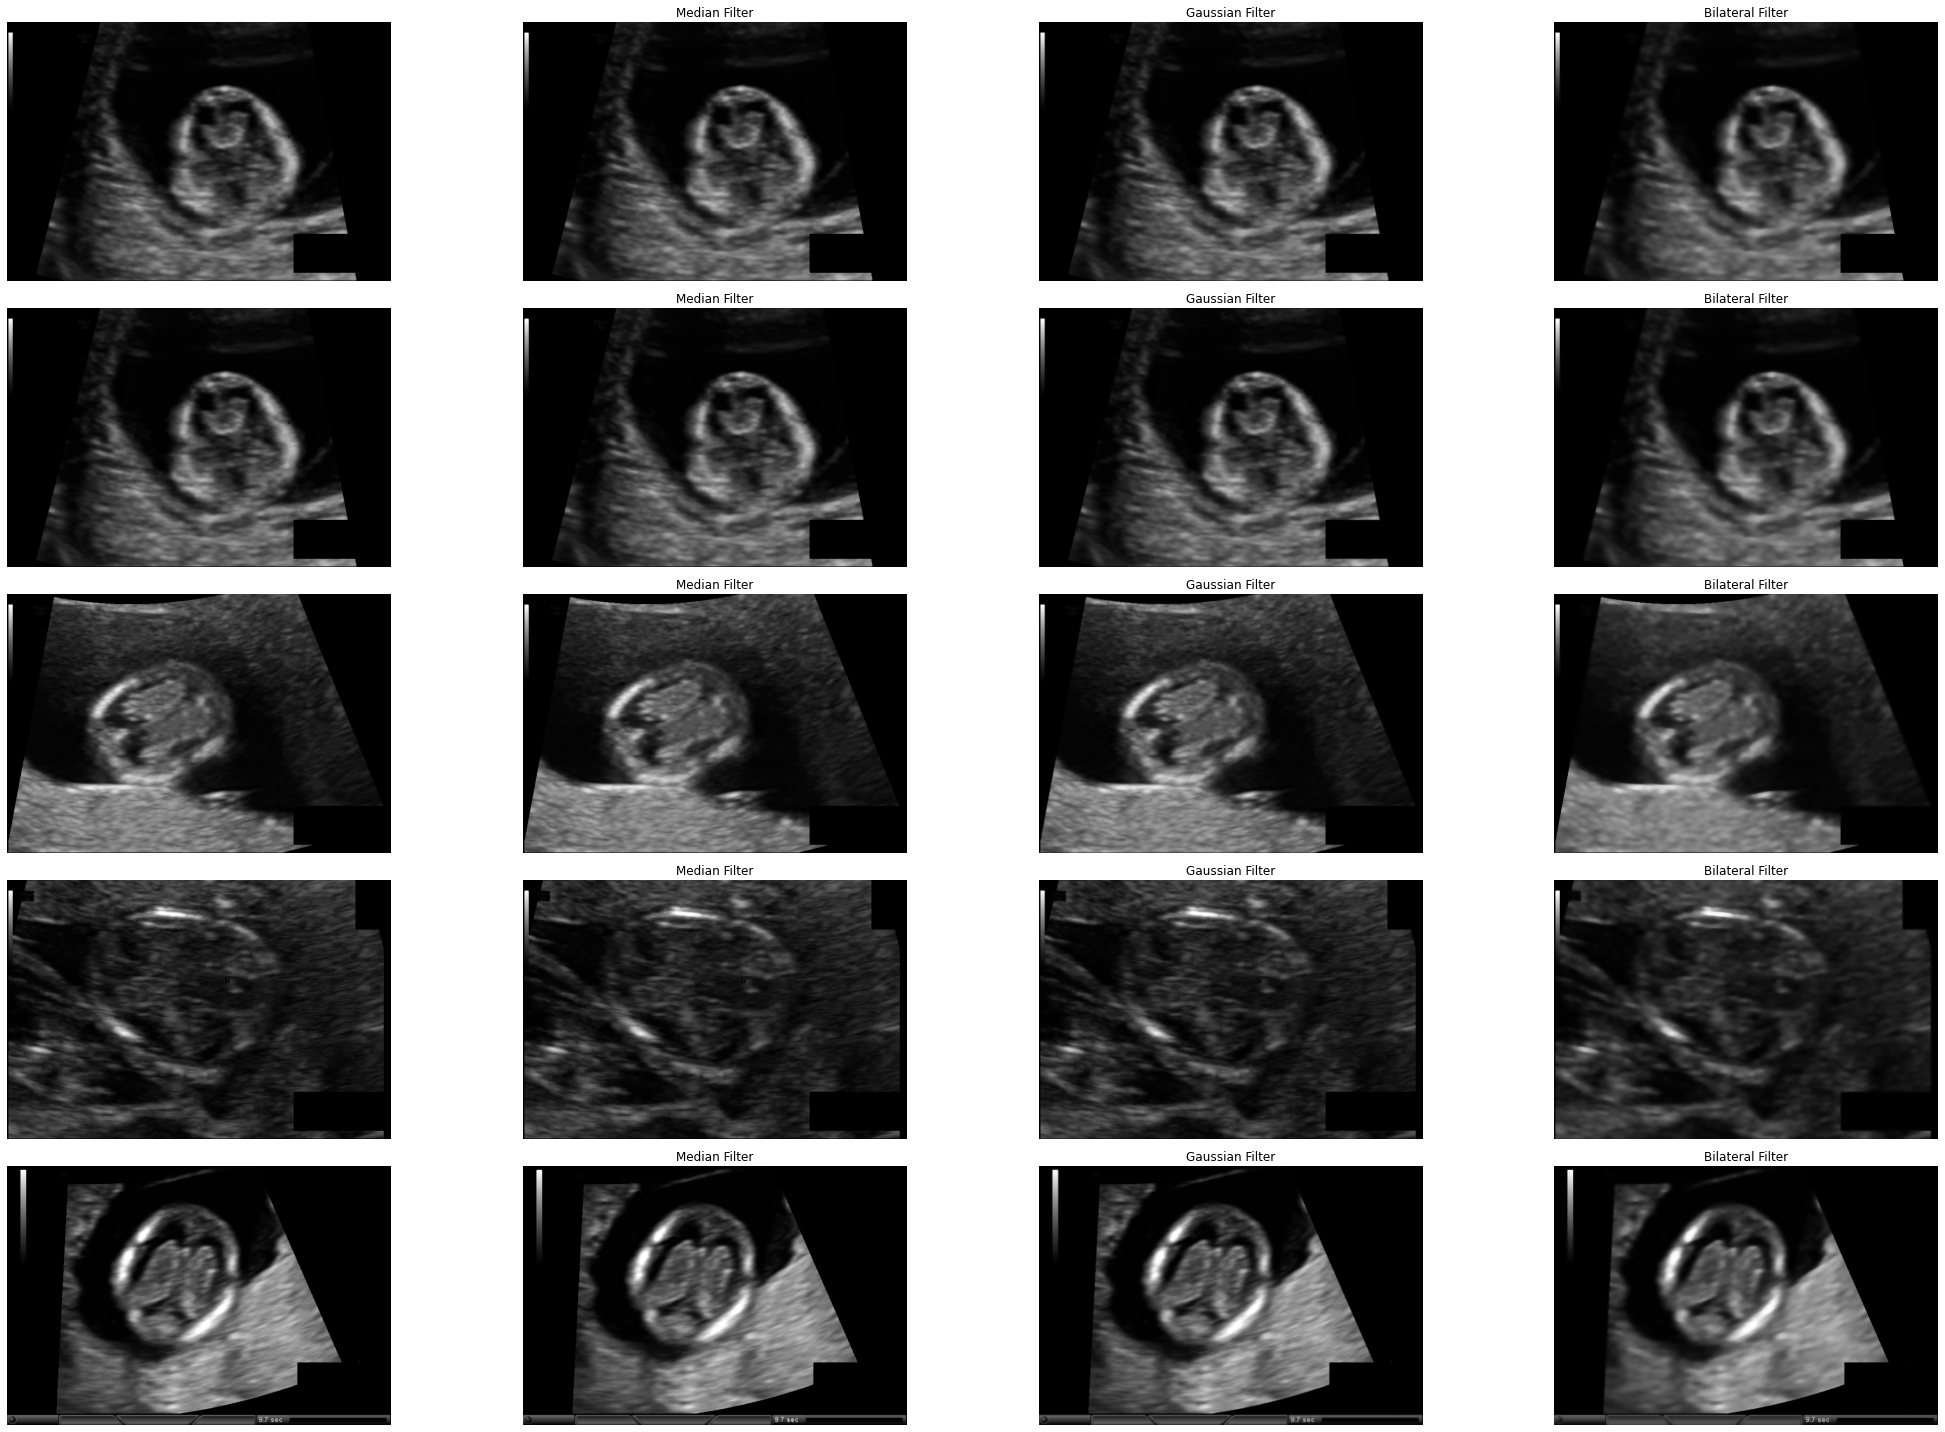

In [17]:
# Added noise and filtering with Median, Gaussian and Bilateral


plt.figure(figsize=(30,20))
i=0
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))

#Iterate and plot random images
while True:
#     i+=1
#     plt.subplot(5, 4, i)
    img = x[int(i/5)]
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')
    
    m = cv2.medianBlur(img,3)
    m = cv2.cvtColor(m,cv2.COLOR_BGR2GRAY)
    g = cv2.GaussianBlur(img,(3,3),0,0)
    g = cv2.cvtColor(g,cv2.COLOR_BGR2GRAY)
    b = cv2.bilateralFilter(img,10, 110, 110, cv2.BORDER_DEFAULT)
    b = cv2.cvtColor(b,cv2.COLOR_BGR2GRAY)

    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    i+=1
    plt.subplot(5, 4, i)
    h = cv2.calcHist([img],[0],None,[256],[0,256])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    i+=1
    plt.subplot(5, 4, i)
    mhi = cv2.calcHist([m],[0],None,[256],[0,256])
    plt.imshow(m, cmap='gray')
    plt.axis('off') 
    plt.title('Median Filter')
    
    i+=1
    plt.subplot(5, 4, i)
    ghi = cv2.calcHist([g],[0],None,[256],[0,256])
    plt.imshow(g, cmap='gray')
    plt.axis('off') 
    plt.title('Gaussian Filter')
    
    i+=1
    plt.subplot(5, 4, i)
    bhi = cv2.calcHist([b],[0],None,[256],[0,256])
    plt.imshow(b, cmap='gray')
    plt.axis('off') 
    plt.title('Bilateral Filter')
    
    j=i/4
    print(f'PSNR of median filtered {j}th scan is {100-PSNR(m,img) : 4f}')
    print(f'PSNR of gaussian filtered {j}th scan is {100-PSNR(g,img): 4f}')
    print(f'PSNR of bilateral filtered {j}th scan is {100-PSNR(b,img) : 4f}')
    if i+1>20:
        break
    
plt.tight_layout()
# plt.savefig('images+hists+filtered.jpg')

## Part 2. Contrast enhancement / Feature Extraction:

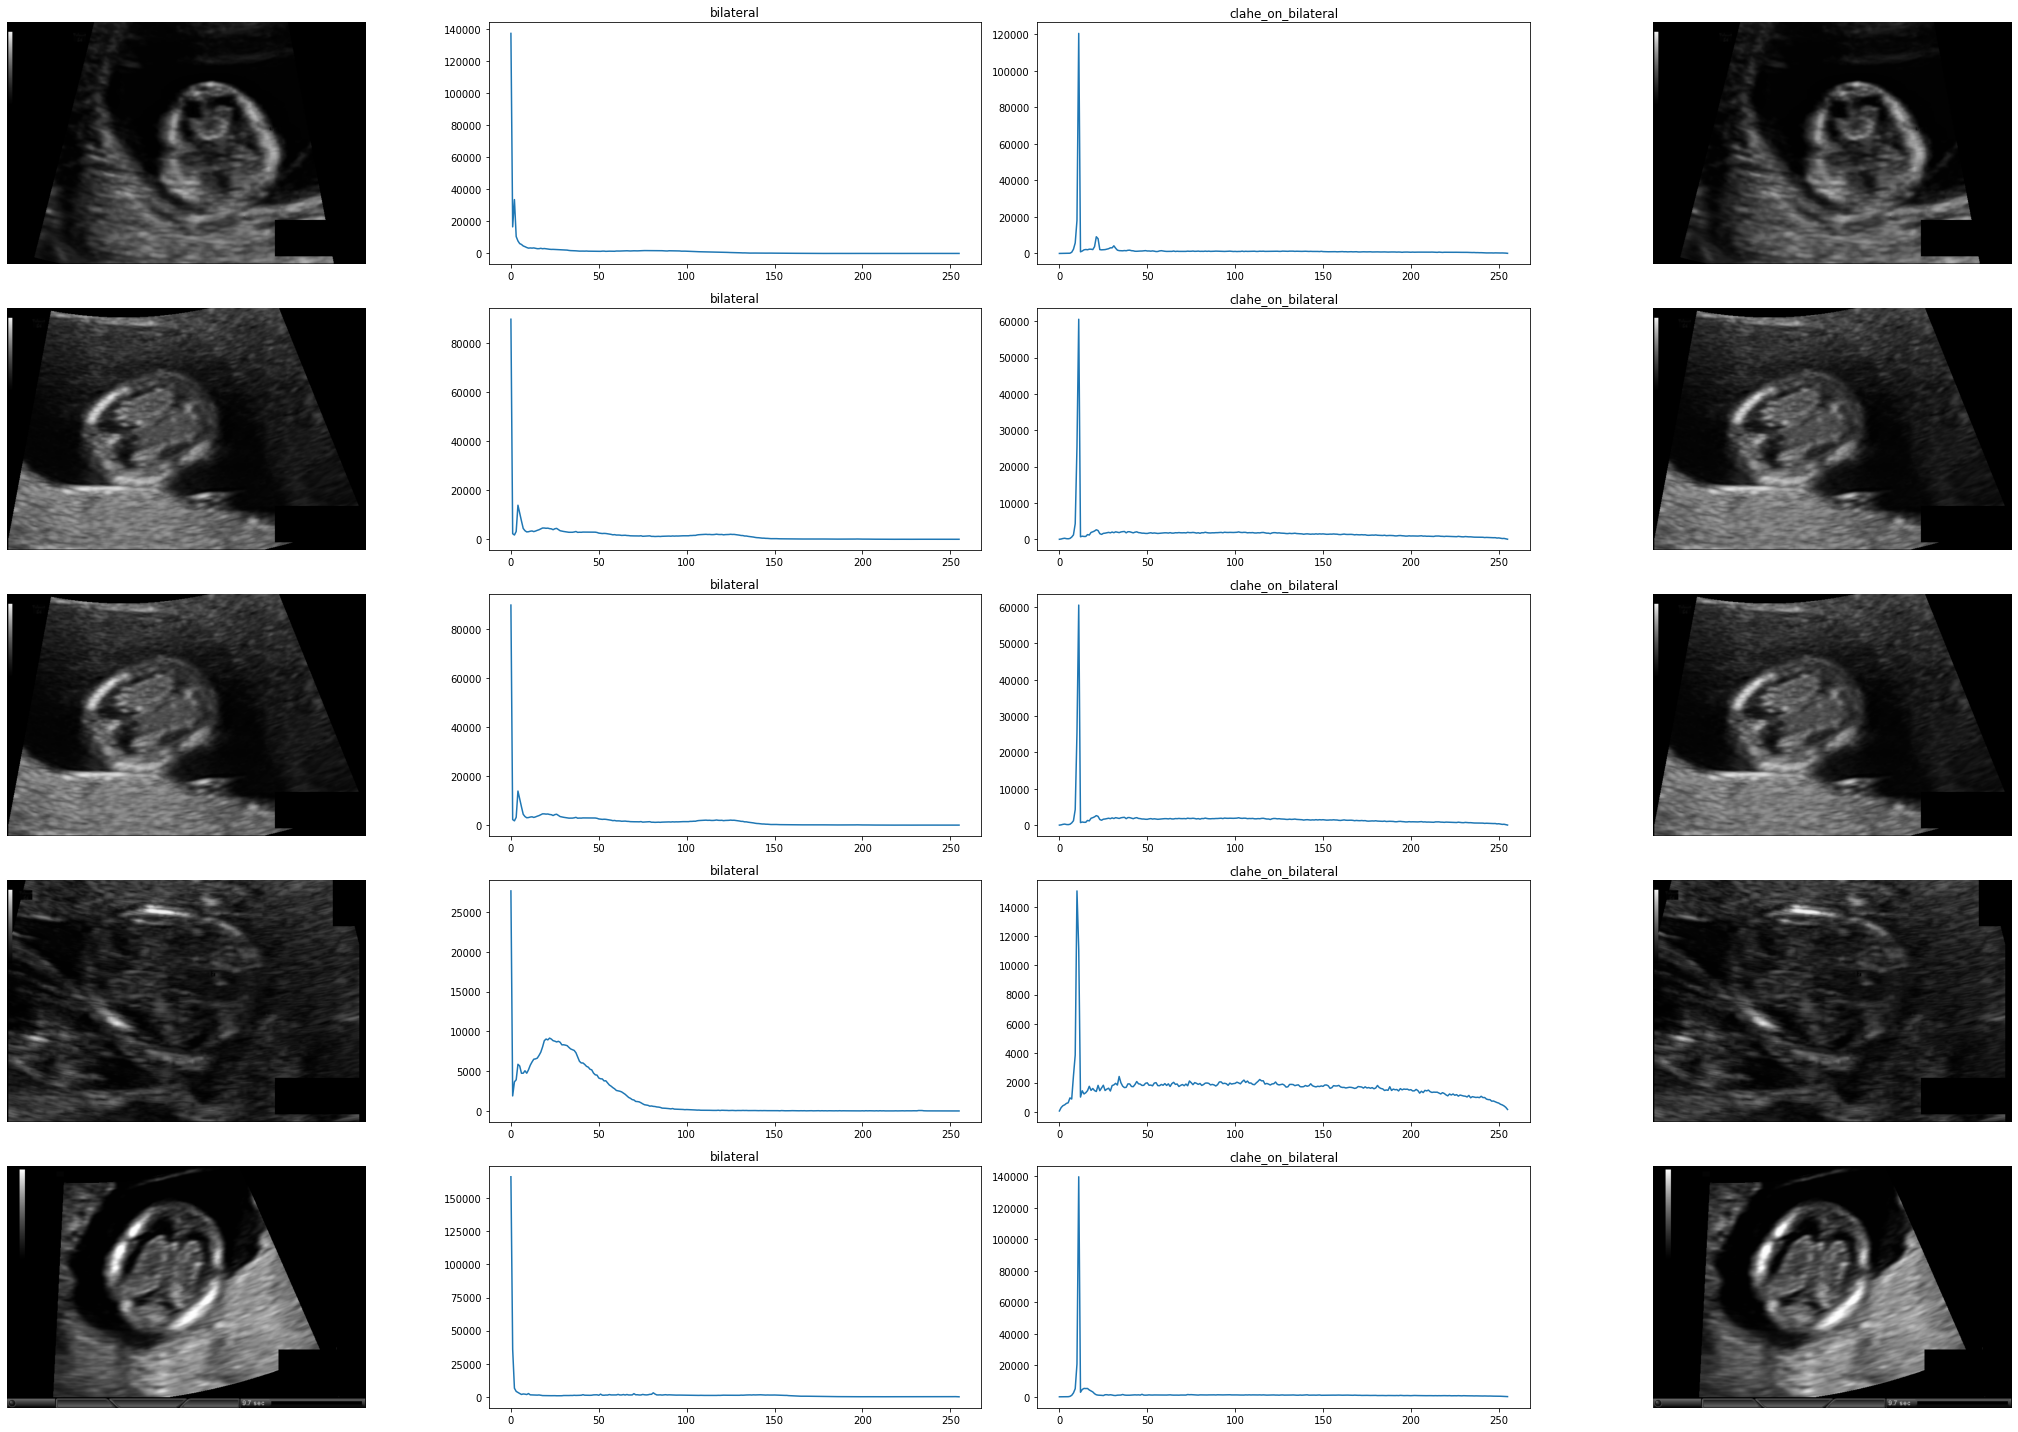

In [18]:
# Trying CLAHE on Bilateral filtered scans
enh=[]
plt.figure(figsize=(30,20))
i=0
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(8,8))

#Iterate and plot random images
while True:
    i+=1
    plt.subplot(5, 4, i)
    img = x[int(i/5)]
    plt.imshow(img, cmap='gray')
    plt.axis('off')
#     cv2.imwrite('original '+str((i)/5)+'.jpg',img)
#     g = cv2.GaussianBlur(img,(3,3),0,0)
#     g = cv2.cvtColor(g,cv2.COLOR_BGR2GRAY)
    b = cv2.bilateralFilter(img,10, 110, 110, cv2.BORDER_DEFAULT)
    b = cv2.cvtColor(b,cv2.COLOR_BGR2GRAY)

#     i+=1
#     plt.subplot(5, 4, i)
#     ghi = cv2.calcHist([g],[0],None,[256],[0,256])
#     plt.plot(ghi)
#     plt.title('gauss')
    i+=1
    plt.subplot(5, 4, i)
    bhi = cv2.calcHist([b],[0],None,[256],[0,256])
    plt.plot(bhi)
    plt.title('bilateral')
    
    i+=1
    a = clahe.apply(b)
    enh.append(a)
#     cv2.imwrite('contrast enhanced '+str((i-2)/5)+'.jpg',a)

    plt.subplot(5, 4, i)
    clahe1 = cv2.calcHist([a],[0],None,[256],[0,256])
    plt.plot(clahe1)
    plt.title('clahe_on_bilateral')
    
    i+=1
    plt.subplot(5, 4, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
     
    if i+1>20:
        break

plt.tight_layout()
# plt.savefig('images+contrast_enhanced.jpg')

In [ ]:
#Not bad but lets try Top-hat transform to enhance contrast as well https://en.wikipedia.org/wiki/Top-hat_transform

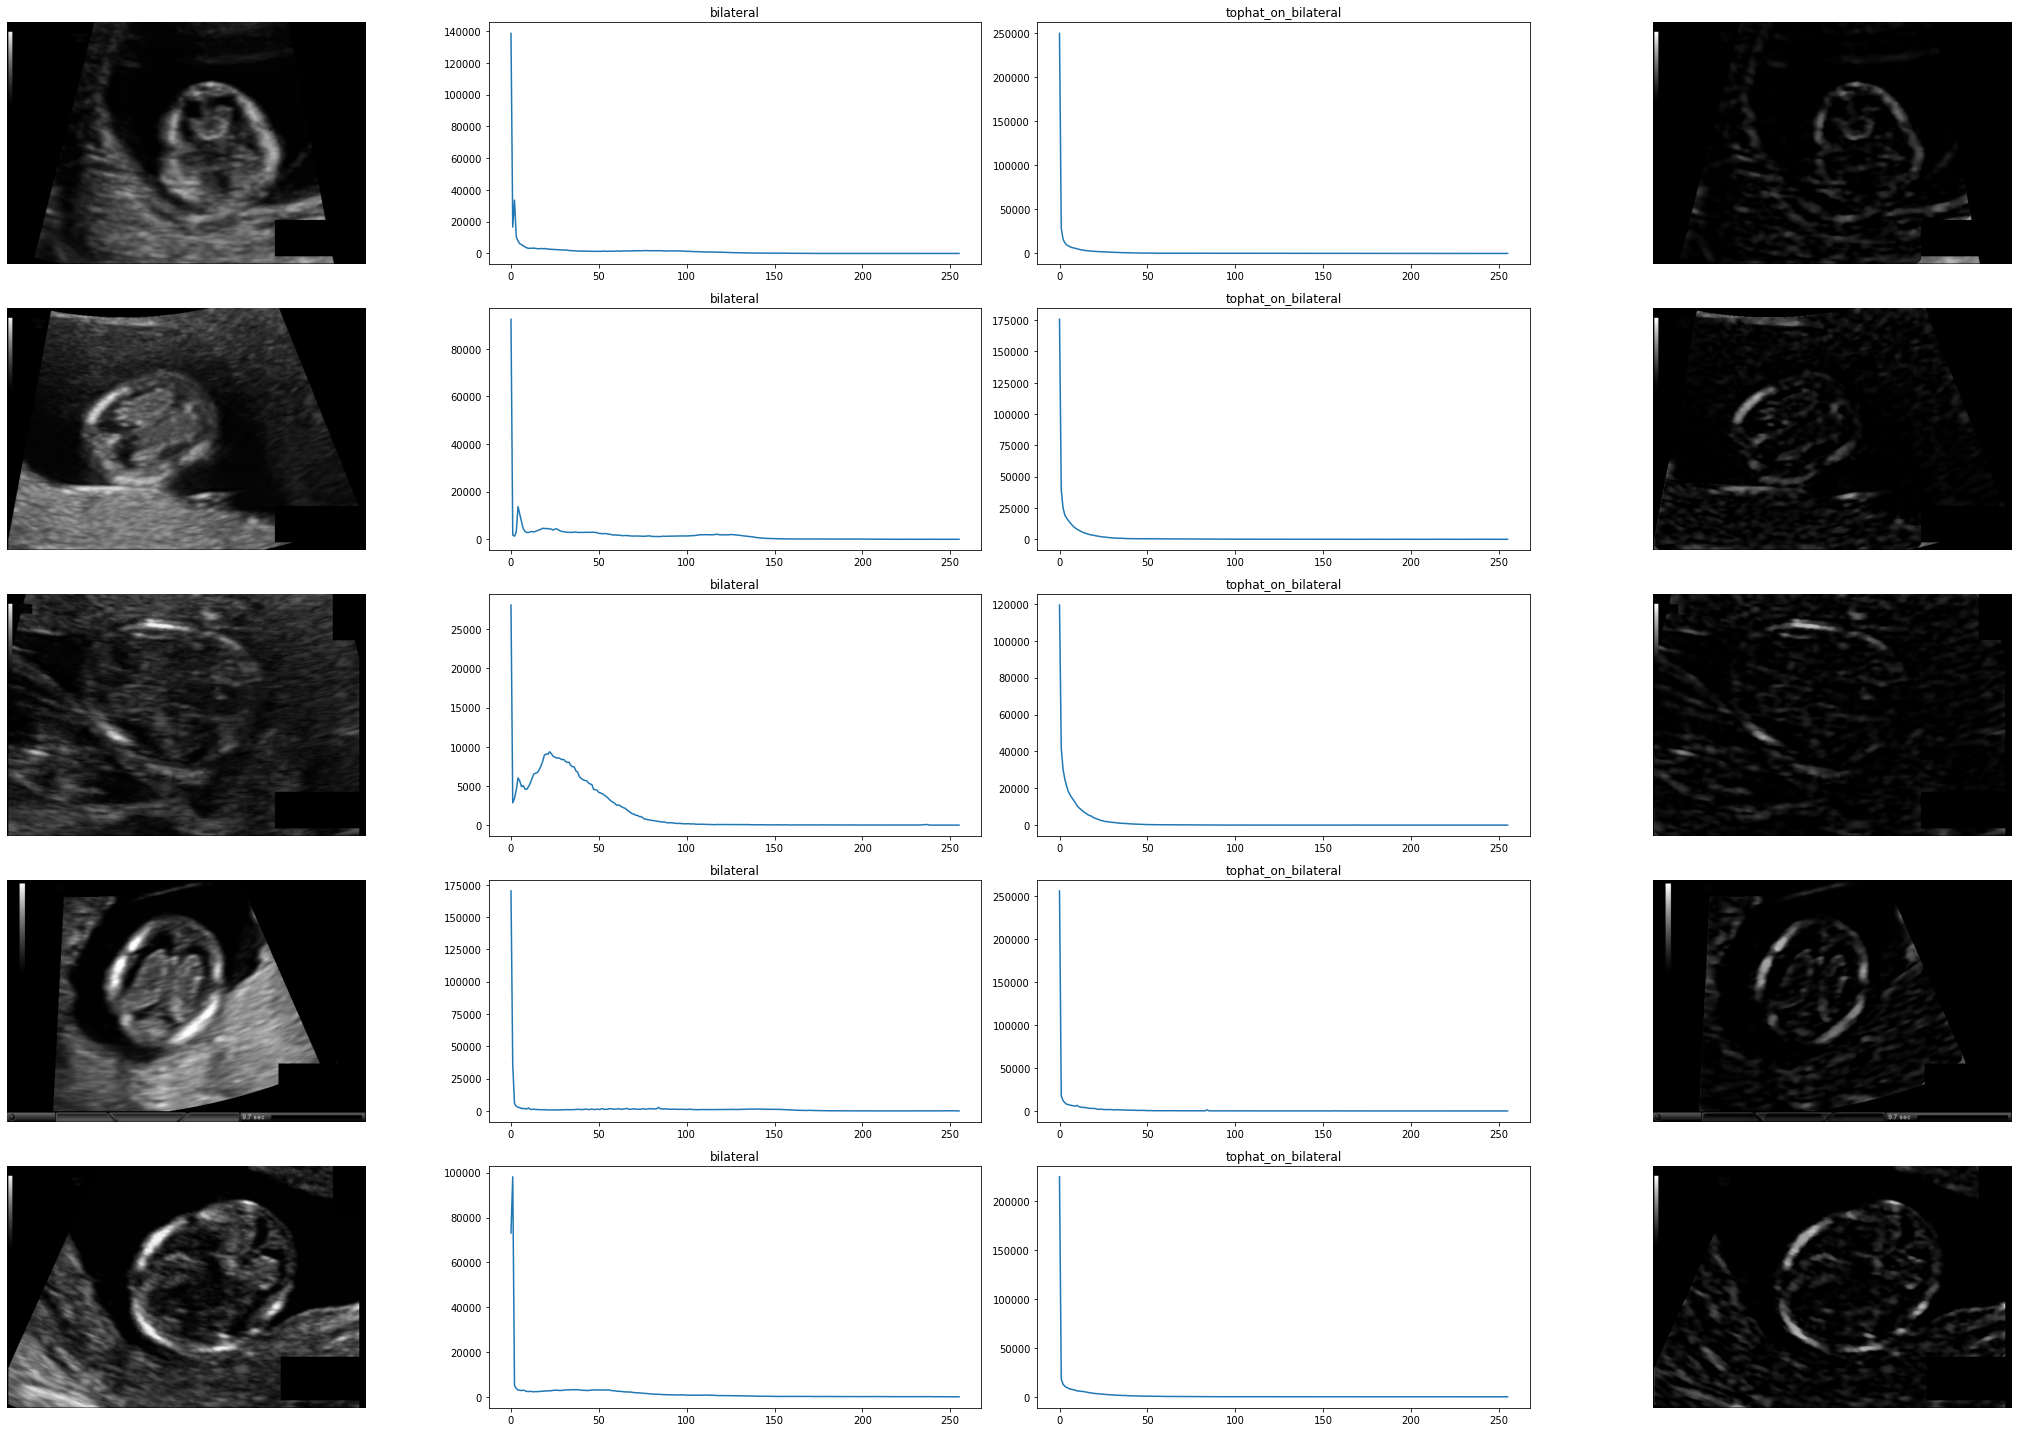

In [19]:
enh1=[]
plt.figure(figsize=(30,20))
i=0
filterSize =(30, 30) 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,filterSize) 
  
while True:
    i+=1
    plt.subplot(5, 4, i)
    img = x[int(i/4)]
    plt.imshow(img, cmap='gray')
    plt.axis('off')
#     cv2.imwrite('original '+str((i)/5)+'.jpg',img)
#     g = cv2.GaussianBlur(img,(3,3),0,0)
#     g = cv2.cvtColor(g,cv2.COLOR_BGR2GRAY)
    b = cv2.bilateralFilter(img,10, 70, 70, cv2.BORDER_DEFAULT)
    b = cv2.cvtColor(b,cv2.COLOR_BGR2GRAY)

#     i+=1
#     plt.subplot(5, 4, i)
#     ghi = cv2.calcHist([g],[0],None,[256],[0,256])
#     plt.plot(ghi)
#     plt.title('gauss')
    i+=1
    plt.subplot(5, 4, i)
    bhi = cv2.calcHist([b],[0],None,[256],[0,256])
    plt.plot(bhi)
    plt.title('bilateral')
    
    i+=1
    
    tophat = cv2.morphologyEx(b,  
                              cv2.MORPH_TOPHAT, 
                              kernel)
    plt.subplot(5, 4, i)
    tophathist = cv2.calcHist([tophat],[0],None,[256],[0,256])
    plt.plot(tophathist)
    plt.title('tophat_on_bilateral')
    enh1.append(tophat)
    i+=1
    plt.subplot(5, 4, i)
    plt.imshow(tophat, cmap='gray')
    plt.axis('off')  
   
    if i+1>20:
        break
    
plt.tight_layout()
# plt.savefig('images+contrast_enhanced.jpg')

In [ ]:
#Looks way Better

## Edge Detection

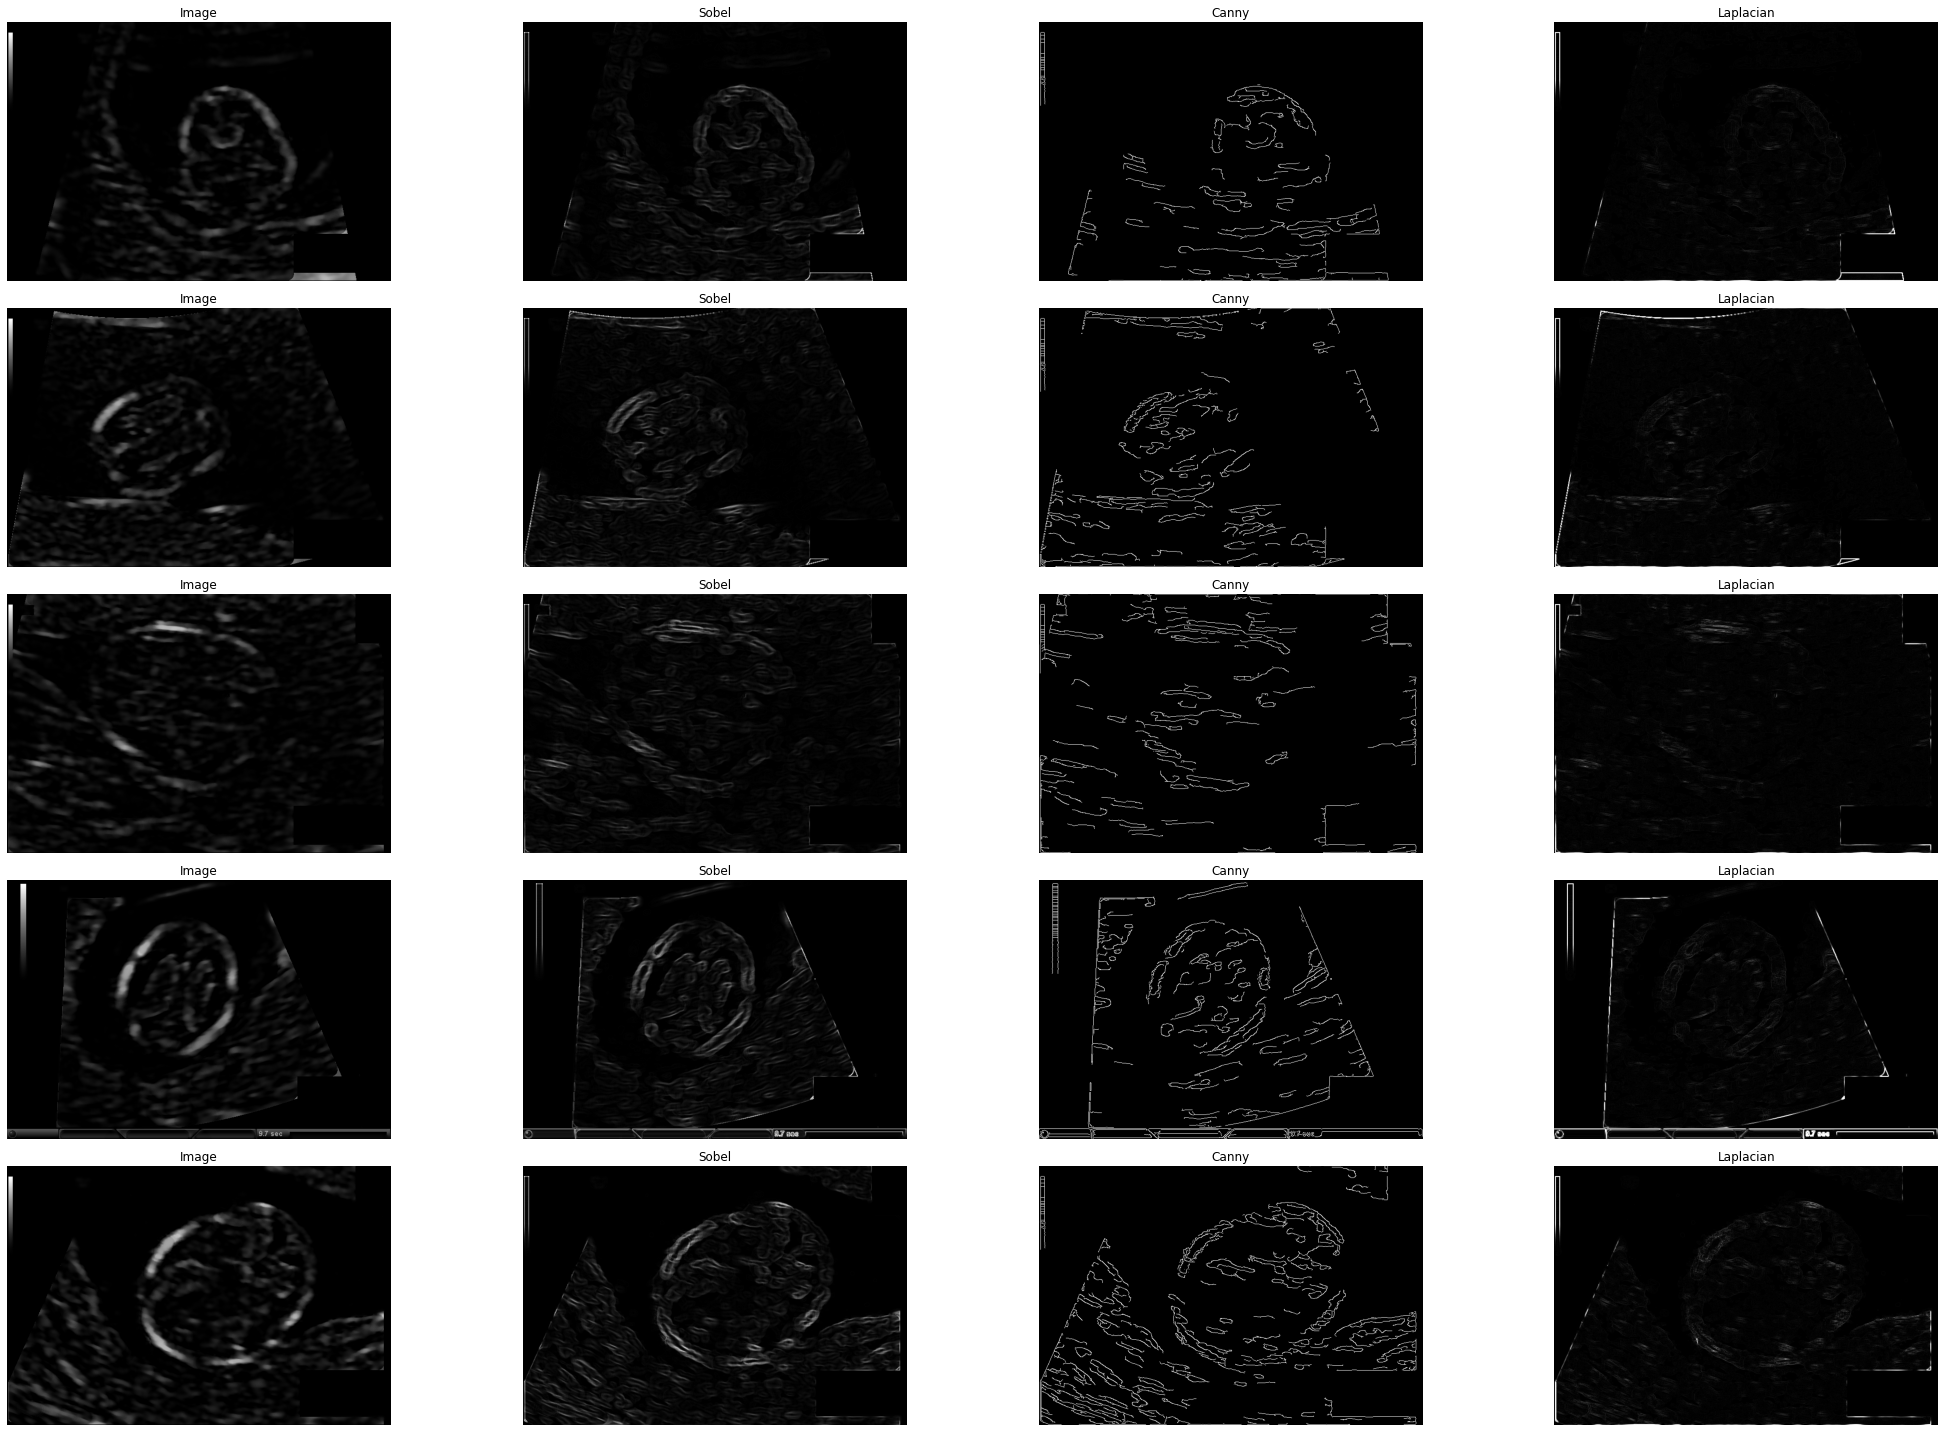

In [20]:
#Now lets compare Edge Detectors - Canny, Sobel and Laplacian 
plt.figure(figsize=(30,20))
i=0
filterSize =(50, 30) 
sob = []
can = []
lap = []
while True:
    i+=1
    plt.subplot(5, 4, i)
    img = enh1[int(i/4)]
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Image')
    
    i+=1
    plt.subplot(5, 4, i)
    grad_x = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    plt.imshow(grad, cmap='gray')
    plt.axis('off')
    plt.title('Sobel')
    sob.append(grad)
    
    i+=1
    plt.subplot(5, 4, i)
    edge = cv2.Canny(img, 10, 70, apertureSize=3,L2gradient=True )
    plt.imshow(edge, cmap='gray')
    plt.axis('off')
    plt.title('Canny')
    can.append(edge)
    
    i+=1
    plt.subplot(5, 4, i)
    dst = cv2.Laplacian(img, cv2.CV_16S, ksize=3)
    abs_dst = cv2.convertScaleAbs(dst)
    plt.imshow(abs_dst, cmap='gray')
    plt.axis('off')
    plt.title('Laplacian')
    lap.append(abs_dst)
        
    if i+1>20:
        break
    
plt.tight_layout()
# plt.savefig('edge_detectors.jpg')

In [21]:
import skimage.measure    
entropy = skimage.measure.shannon_entropy(sob[1])

In [22]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [23]:
for j in range(5):
    print(f'PSNR of Sobel on {j+1}th scan is {PSNR(sob[j],enh1[j]) : 4f}')
    print(f'PSNR of Canny on {j+1}th scan is {PSNR(can[j],enh1[j]): 4f}')
    print(f'PSNR of Laplacian on {j+1}th scan is {PSNR(lap[j],enh1[j]) : 4f}')

PSNR of Sobel on 1th scan is  34.945827
PSNR of Canny on 1th scan is  33.806974
PSNR of Laplacian on 1th scan is  34.189752
PSNR of Sobel on 2th scan is  34.087387
PSNR of Canny on 2th scan is  32.683070
PSNR of Laplacian on 2th scan is  33.275631
PSNR of Sobel on 3th scan is  33.306902
PSNR of Canny on 3th scan is  31.699208
PSNR of Laplacian on 3th scan is  32.370970
PSNR of Sobel on 4th scan is  34.052928
PSNR of Canny on 4th scan is  33.233100
PSNR of Laplacian on 4th scan is  33.508130
PSNR of Sobel on 5th scan is  33.219048
PSNR of Canny on 5th scan is  32.311359
PSNR of Laplacian on 5th scan is  32.692189


In [24]:
for j in range(5):
    print(f'MSE of Sobel on {j+1}th scan is {mse(sob[j],enh1[j]) : 4f}')
    print(f'MSE of Canny on {j+1}th scan is {mse(can[j],enh1[j]): 4f}')
    print(f'MSE of Laplacian on {j+1}th scan is {mse(lap[j],enh1[j]) : 4f}')

MSE of Sobel on 1th scan is  201.837106
MSE of Canny on 1th scan is  1093.742546
MSE of Laplacian on 1th scan is  380.708516
MSE of Sobel on 2th scan is  223.232569
MSE of Canny on 2th scan is  1486.021630
MSE of Laplacian on 2th scan is  490.174954
MSE of Sobel on 3th scan is  177.978030
MSE of Canny on 3th scan is  1595.489127
MSE of Laplacian on 3th scan is  447.373829
MSE of Sobel on 4th scan is  382.414826
MSE of Canny on 4th scan is  1898.845139
MSE of Laplacian on 4th scan is  789.817947
MSE of Sobel on 5th scan is  316.261384
MSE of Canny on 5th scan is  2372.226282
MSE of Laplacian on 5th scan is  531.158766


In [25]:
for j in range(5):
    print(f'Entropy of Sobel on {j+1}th scan is {skimage.measure.shannon_entropy(sob[j]) : 4f}')
    print(f'Entropy of Canny on {j+1}th scan is {skimage.measure.shannon_entropy(can[j]): 4f}')
    print(f'Entropy of Laplacian on {j+1}th scan is {skimage.measure.shannon_entropy(lap[j]) : 4f}')

Entropy of Sobel on 1th scan is  3.223776
Entropy of Canny on 1th scan is  0.117662
Entropy of Laplacian on 1th scan is  2.049679
Entropy of Sobel on 2th scan is  3.943252
Entropy of Canny on 2th scan is  0.156916
Entropy of Laplacian on 2th scan is  2.498258
Entropy of Sobel on 3th scan is  4.330429
Entropy of Canny on 3th scan is  0.165555
Entropy of Laplacian on 3th scan is  2.701470
Entropy of Sobel on 4th scan is  3.394497
Entropy of Canny on 4th scan is  0.189539
Entropy of Laplacian on 4th scan is  2.279397
Entropy of Sobel on 5th scan is  3.864813
Entropy of Canny on 5th scan is  0.227405
Entropy of Laplacian on 5th scan is  2.527617


## Part 3: Application of Hough Transform

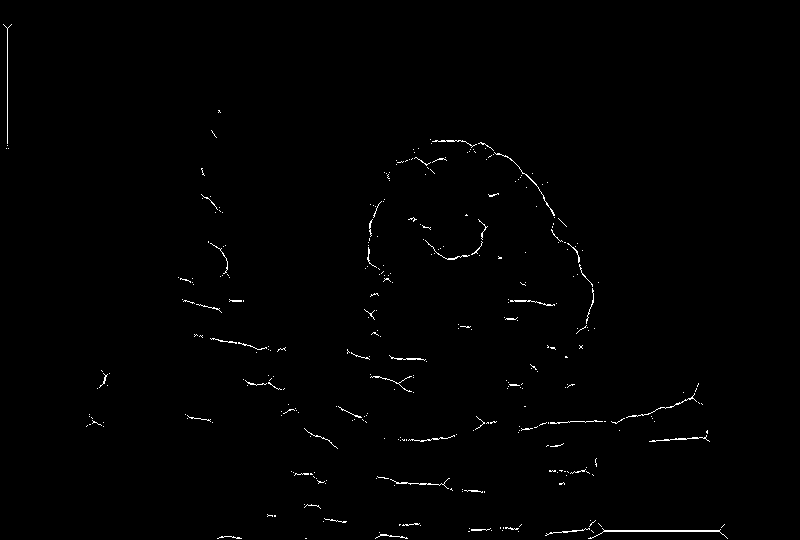

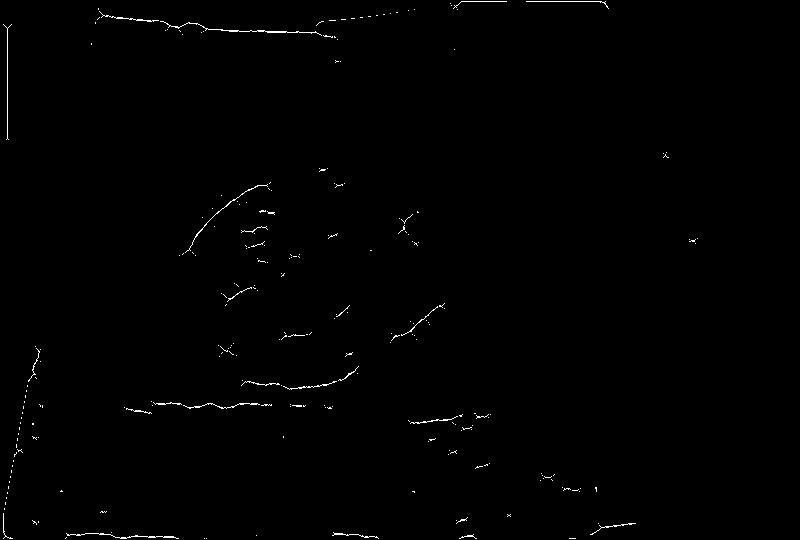

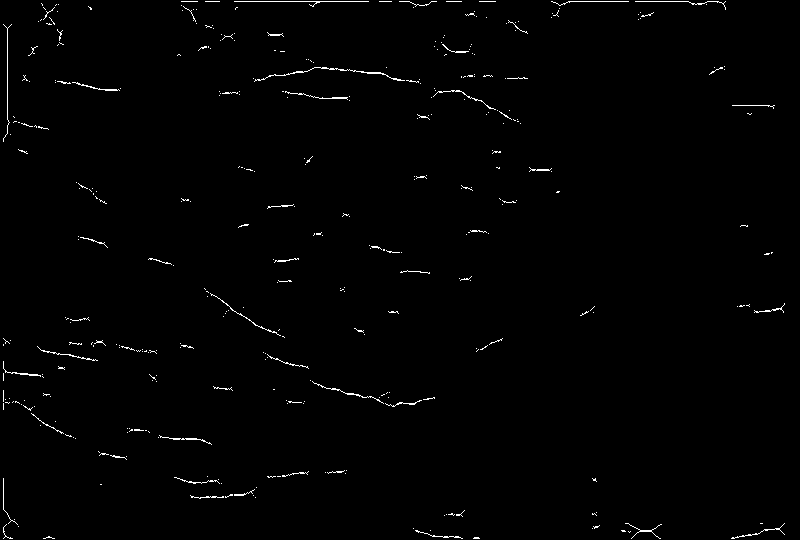

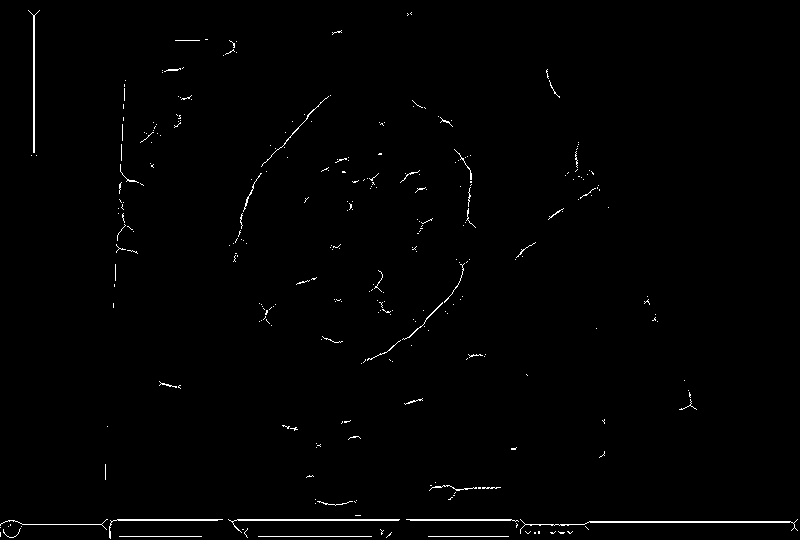

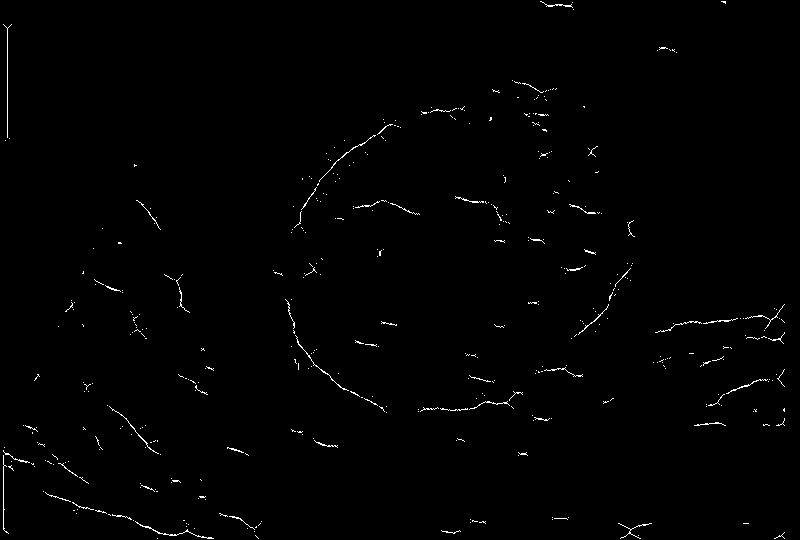

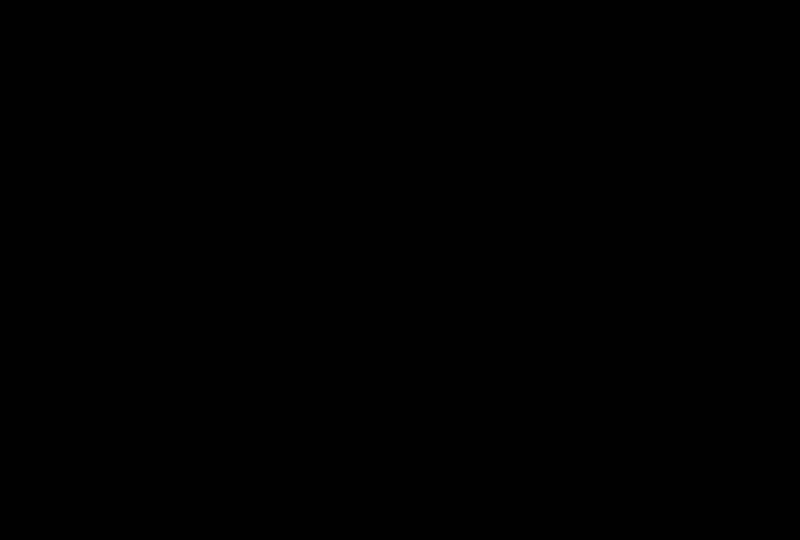

In [42]:
#Otsu + Binary Thresolding + Skeletonise by erosion

trans = []
for i in range(5):
    imedge=enh1[i]
    ret3,th3 = cv2.threshold(imedge,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img = th3
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)

    ret,img = cv2.threshold(img,127,255,0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False

    while( not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
    dist=skel
    otsu_edge = cv2.Canny(th3, 10, 80, apertureSize=3,L2gradient=True )

    dist1 = cv2.distanceTransform(th3,cv2.DIST_C,3)
    dist2 = cv2.normalize(dist1, 0, 50.0, cv2.NORM_L2)
    kernel = np.ones((3,3),np.uint8)
    erosion5 = cv2.erode(dist2,kernel,iterations = 1)

    #cv2_imshow(x[i])
    #cv2_imshow(imedge)#white hat transformed
    #cv2_imshow(th3)#'Canny + otsu_thresholding'
    #cv2_imshow(dist)#'dist_otsu',
    cv2_imshow(dist)
    #cv2_imshow(dist2)#'Skeletonise'
    trans.append(dist)
    #cv2_imshow(erosion5)#'eroded',
    if i==4:
        cv2.imwrite('im_orig.jpg',x[i])
        cv2.imwrite('im_contrast_enhanced.jpg',imedge)
        cv2.imwrite('im_otsu_thresh.jpg',th3)
        cv2_imshow(dist2)#'dist_otsu',
        cv2.imwrite('im_skeletonize.jpg',dist)


    cv2.waitKey()
    cv2.destroyAllWindows()
    



In [45]:
print(x[0].shape)

(540, 800, 3)


In [47]:
#Lets trim the background of the scans edges
trim = []
print(trans[0].shape)
for i in range(5):
    trim.append(trans[i][40:500,int(800/6):int(5*800/6)])

(540, 800)


(460, 533)


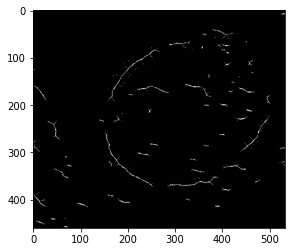

In [49]:
print(trim[0].shape)
plt.imshow(trim[4],cmap='gray')

In [50]:
for i in range(5):
  cv2.imwrite(f'transform_{i}.jpg',trim[i])

### Run the Matlab code <scan{1-5}.m> files to fit the ellipse on the scans using Iterative Hough Transform. Ensure <ellipseDetection.m> and <ellipse.m> are also in the same folder 

Iterative Hough Transform takes a lot of time to run in python and so MATLAB was used

In [61]:
#Import the detected ellipses
y = []
yt =[]
for i in range(5):
    yt.append(cv2.imread('./truths/truths '+str(i)+'.jpg'))
    y.append(cv2.imread(str(i)+'.jpg'))
truths = []
for i in range(5):
    truths.append(y[i][40:500,int(800/6):int(5*800/6)])
y=truths
print(yt[0].shape,y[0].shape)

(460, 533, 3) (460, 533, 3)


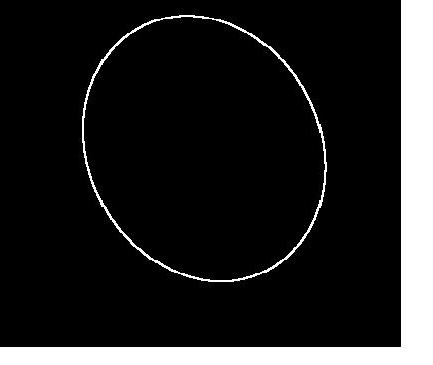

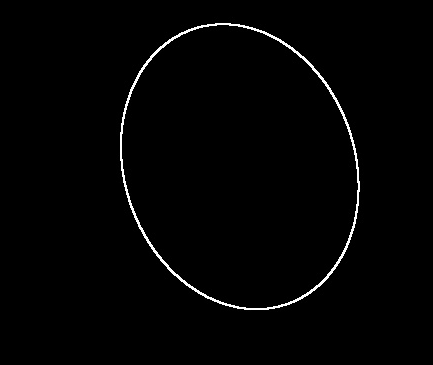

In [62]:

cv2_imshow(y[0][80:445,100:600])#detected
cv2_imshow(yt[0][80:445,100:600])#truth
cv2.waitKey()
cv2.destroyAllWindows()

In [63]:
#METRICS
def dice(im1, im2):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())

import numpy
from scipy.ndimage import _ni_support
from scipy.ndimage.morphology import distance_transform_edt, binary_erosion,\
    generate_binary_structure
from scipy.ndimage.measurements import label, find_objects
from scipy.stats import pearsonr
def hd95(result, reference, voxelspacing=None, connectivity=1):
    """
    95th percentile of the Hausdorff Distance.

    Computes the 95th percentile of the (symmetric) Hausdorff Distance (HD) between the binary objects in two
    images. Compared to the Hausdorff Distance, this metric is slightly more stable to small outliers and is
    commonly used in Biomedical Segmentation challenges.

    """
    hd1 = __surface_distances(result, reference, voxelspacing, connectivity)
    hd2 = __surface_distances(reference, result, voxelspacing, connectivity)
    hd95 = numpy.percentile(numpy.hstack((hd1, hd2)), 95)
    return hd95
def __surface_distances(result, reference, voxelspacing=None, connectivity=1):
    """
    The distances between the surface voxel of binary objects in result and their
    nearest partner surface voxel of a binary object in reference.
    """
    result = numpy.atleast_1d(result.astype(numpy.bool))
    reference = numpy.atleast_1d(reference.astype(numpy.bool))
    if voxelspacing is not None:
        voxelspacing = _ni_support._normalize_sequence(voxelspacing, result.ndim)
        voxelspacing = numpy.asarray(voxelspacing, dtype=numpy.float64)
        if not voxelspacing.flags.contiguous:
            voxelspacing = voxelspacing.copy()
            
    # binary structure
    footprint = generate_binary_structure(result.ndim, connectivity)
    
    # test for emptiness
    if 0 == numpy.count_nonzero(result): 
        raise RuntimeError('The first supplied array does not contain any binary object.')
    if 0 == numpy.count_nonzero(reference): 
        raise RuntimeError('The second supplied array does not contain any binary object.')    
            
    # extract only 1-pixel border line of objects
    result_border = result ^ binary_erosion(result, structure=footprint, iterations=1)
    reference_border = reference ^ binary_erosion(reference, structure=footprint, iterations=1)
    
    # compute average surface distance        
    # Note: scipys distance transform is calculated only inside the borders of the
    #       foreground objects, therefore the input has to be reversed
    dt = distance_transform_edt(~reference_border, sampling=voxelspacing)
    sds = dt[result_border]
    
    return sds
def ravd(result, reference):
    """
    Relative absolute surface difference.
    
    Compute the relative absolute surface difference between the (joined) binary objects
    in the two images.
    
    Parameters
    ----------
    result : array_like
        Input data containing objects. Can be any type but will be converted
        into binary: background where 0, object everywhere else.
    reference : array_like
        Input data containing objects. Can be any type but will be converted
        into binary: background where 0, object everywhere else.
        
    Returns
    -------
    ravd : float
        The relative absolute volume difference between the object(s) in ``result``
        and the object(s) in ``reference``. This is a percentage value in the range
        :math:`[-1.0, +inf]` for which a :math:`0` denotes an ideal score.
       
    
    """
    result = numpy.atleast_1d(result.astype(numpy.bool))
    reference = numpy.atleast_1d(reference.astype(numpy.bool))
        
    vol1 = numpy.count_nonzero(result)
    vol2 = numpy.count_nonzero(reference)
    
    if 0 == vol2:
        raise RuntimeError('The second supplied array does not contain any binary object.')
    
    return (vol1 - vol2) / float(vol2)
def asd(result, reference, voxelspacing=None, connectivity=1):
    """
    Average surface distance metric.
    
    Computes the average surface distance (ASD) between the binary objects in two images.
    
    Parameters
    ----------
    result : array_like
        Input data containing objects. Can be any type but will be converted
        into binary: background where 0, object everywhere else.
    reference : array_like
        Input data containing objects. Can be any type but will be converted
        into binary: background where 0, object everywhere else.
    voxelspacing : float or sequence of floats, optional
        The voxelspacing in a distance unit i.e. spacing of elements
        along each dimension. If a sequence, must be of length equal to
        the input rank; if a single number, this is used for all axes. If
        not specified, a grid spacing of unity is implied.
    connectivity : int
        The neighbourhood/connectivity considered when determining the surface
        of the binary objects. This value is passed to
        `scipy.ndimage.morphology.generate_binary_structure` and should usually be :math:`> 1`.
        The decision on the connectivity is important, as it can influence the results
        strongly. If in doubt, leave it as it is.
    
    Returns
    -------
    asd : float
        The average surface distance between the object(s) in ``result`` and the
        object(s) in ``reference``. The distance unit is the same as for the spacing
        of elements along each dimension, which is usually given in mm.
        
    
    """
    sds = __surface_distances(result, reference, voxelspacing, connectivity)
    asd = sds.mean()
    return asd


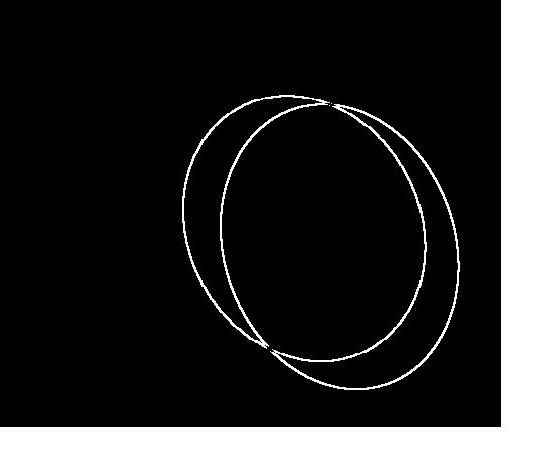

In [64]:
#Overlap of one scan
diff = []
for i in range(5):
    diff.append(cv2.absdiff(y[i],yt[i]))
cv2_imshow(diff[0])#'OVERLAP'
cv2.waitKey()
cv2.destroyAllWindows()

In [65]:
#Visualize all overlaps
s = []
st =[]
for i in range(5):
    st.append(cv2.imread('./truths/'+str(i)+'.jpg'))
    s.append(cv2.imread(str(i)+'.jpg'))

    

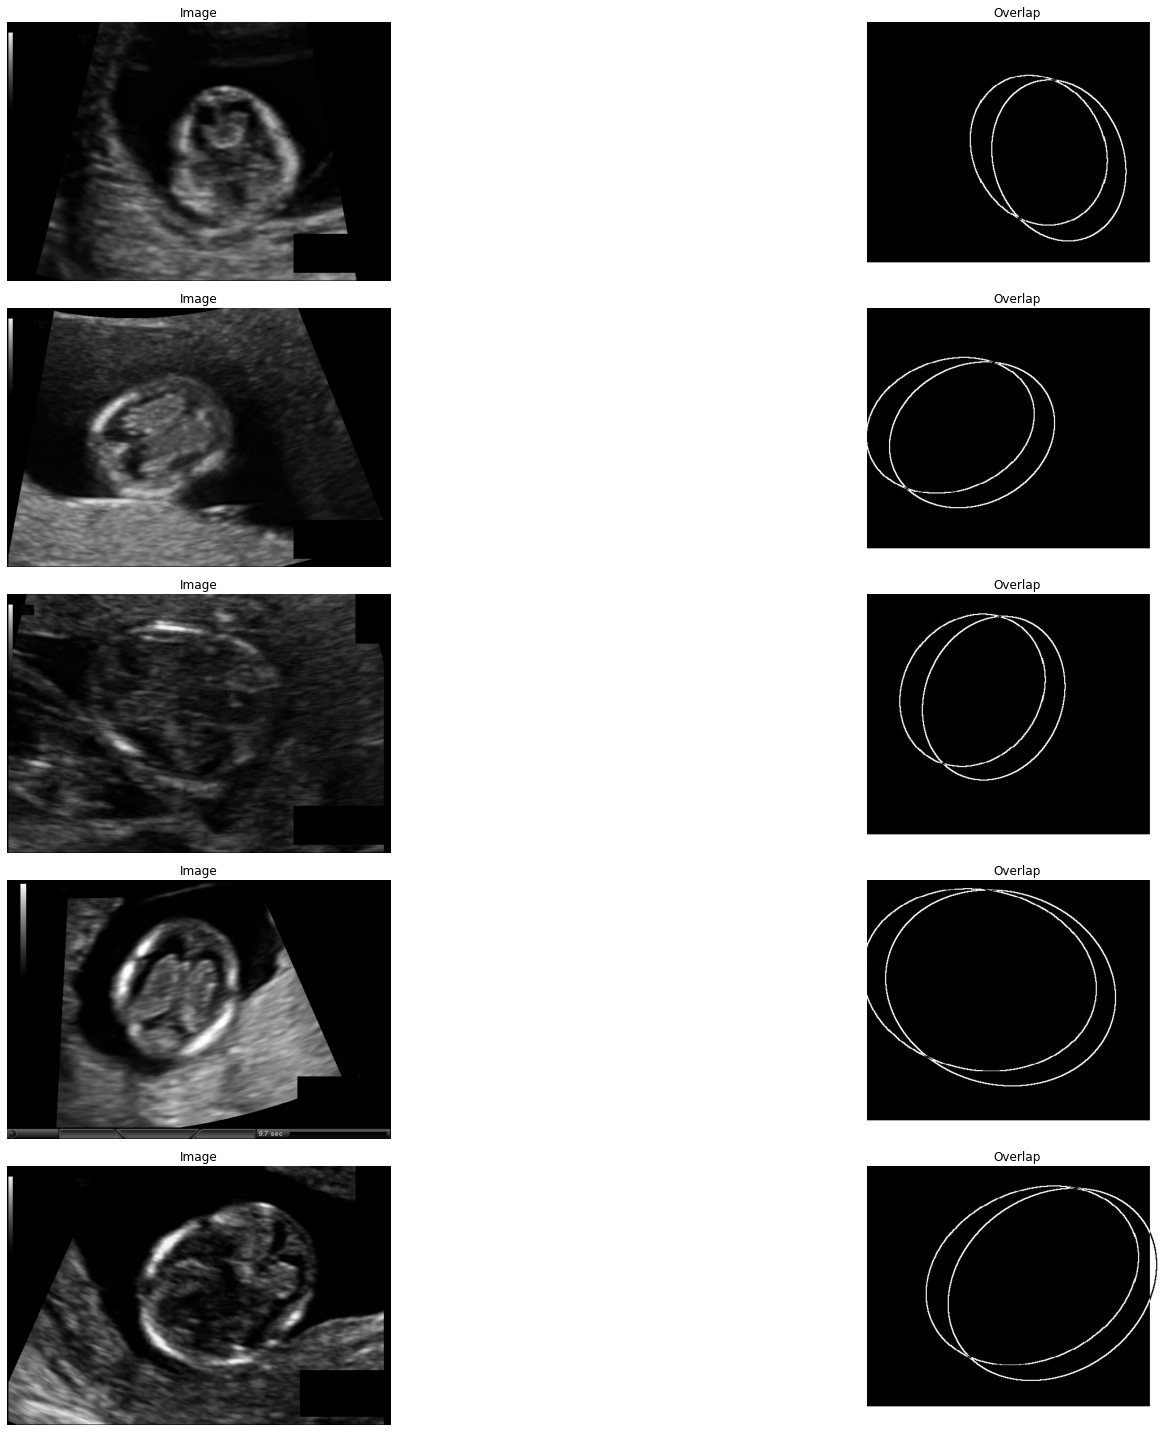

In [67]:
plt.figure(figsize=(30,20))
i=0
filterSize =(30, 20) 
  
while True:
    i+=1
    plt.subplot(5, 2, i)
    img = x[int(i/2)]
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Image')
    j=int(i/2)
    i+=1
    plt.subplot(5, 2, i)
    plt.imshow(cv2.absdiff(y[j],yt[j]), cmap='gray')
    plt.axis('off')
    plt.title('Overlap')
    
        
    if i+1>10:
        break
    

plt.tight_layout()
# plt.savefig('all_overlaps.jpg')

In [68]:
#Dice coefficient
dice_metric = []
for i in range(5):
    dice_metric.append(dice(y[i],yt[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [69]:
dice_metric

[0.011727748691099476,
 0.01057759220598469,
 0.00903163375803516,
 0.021040903344689423,
 0.04288407163053723]

In [70]:
#Hausdorff Distance

haus_metric = []
Y=[]
Yt=[]
for i in range(5):
    Y.append(cv2.cvtColor(y[i],cv2.COLOR_RGB2GRAY))
    Yt.append(cv2.cvtColor(yt[i],cv2.COLOR_RGB2GRAY))

    haus_metric.append(hd95(Y[i][80:445,100:600], Yt[i][80:445,100:600]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [71]:
haus_metric

[96.18939529159225,
 208.89734266539193,
 204.93410753336383,
 115.96723670116144,
 82.73451516749222]

In [72]:
#Relative absolute surface difference
vdiff_metric = []
for i in range(5):
    vdiff_metric.append(np.abs(ravd(y[i][80:445,100:600],yt[i][80:445,100:600])))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [73]:
vdiff_metric

[4.3075010360547035,
 5.741796200345423,
 5.378295008412787,
 6.054429996976111,
 4.001175318315377]

In [74]:
#Average surface difference

diff_metric = []
for i in range(5):
    diff_metric.append((asd(y[i][80:445,100:600],yt[i][80:445,100:600])))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [75]:
diff_metric 

[59.71969670982823,
 139.48710937208688,
 142.837533233903,
 78.49957043329255,
 44.0702868191843]

In [ ]:
import math

def calculate_perimeter(a,b):
    perimeter = math.pi * ( 3*(a+b) - math.sqrt( (3*a + b) * (a + 3*b) ) )
    return perimeter
def error_perc(y, y_pred):
    return np.absolute(y-y_pred)*100/y

circum_in_pixels = []
    
maj_minor = [ [283.5363,222.4385],[301.6369,258.0478],[254.1441 ,224.1480],[385.7825,370.1430 ],[379.9067 ,303.9660]]

circum_truth = np.array([72.09,73.96,78.5,71.9,72.8])
pix_to_mm = np.array([0.087755845, 0.085636069, 0.092240975, 0.060673679, 0.065501081])

for i in range(5):
    circum_in_pixels.append(calculate_perimeter(maj_minor[i][0]/2,maj_minor[i][1]/2))
circum_in_pixels = np.asarray(circum_in_pixels)

circum_in_mm = pix_to_mm*circum_in_pixels
abs_perc = error_perc(circum_truth,circum_in_mm)

for i in range(5):
    print(f'Circumference of fetal head of scan {i+1} is {circum_in_mm[i]}%')
    print(f'Absolute percetage error in circumference of fetal head of scan {i+1} is {abs_perc[i]:.2f}%')
